In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
import yfinance as yf
from concurrent import futures
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import quandl
#from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

In [2]:
os.chdir('../Statistics/')

In [3]:
nifty_bank_shares = pd.read_excel('nifty bank shares.xlsx',header=0)

In [4]:
nifty_bank_shares.head()

,Bank/Company Name,Symbol,Weightage,Data Available from
0,HDFC Bank Ltd.,HDFCBANK,0.2839,NaT
1,ICICI Bank Ltd.,ICICIBANK,0.1948,NaT
2,Kotak Mahindra Bank Ltd.,KOTAKBANK,0.1631,NaT
3,Axis Bank Ltd.,AXISBANK,0.1495,NaT
4,State Bank of India,SBIN,0.0956,NaT


In [81]:
os.chdir('../PIV/')

In [82]:
df = yf.download('HDFCBANK.NS',start='2010-01-01',end='2020-12-15')

[*********************100%***********************]  1 of 1 completed


In [84]:
bad_tickers = []
def get_data(symbol):
    try:
        df = yf.download(symbol+'.NS',start='2020-10-01',end='2021-01-10')
        df['Symbol'] = symbol
        df = df[['Symbol','Open','High','Low','Close','Adj Close','Volume']]
        df.to_csv(symbol+'.csv')
    except:
        bad_tickers.append(symbol)
        print(f'Data not found for {symbol}')

In [85]:
for symbol in list(nifty_bank_shares['Symbol']):
    get_data(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [86]:
df = yf.download('^NSEBANK',start='2020-10-01',end='2021-01-10')

[*********************100%***********************]  1 of 1 completed


In [87]:
df['Symbol'] = 'Nifty Bank'
df = df[['Symbol','Open','High','Low','Close','Adj Close','Volume']]
df.to_csv('niftybank.csv')

In [88]:
niftybank = pd.read_csv('niftybank.csv',header=0)

In [89]:
niftybank.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,Nifty Bank,21685.250000,22293.750000,21664.150391,22246.000000,22246.000000,0
1,2020-10-05,Nifty Bank,22352.099609,22768.550781,22247.250000,22370.949219,22370.949219,0
2,2020-10-06,Nifty Bank,22673.050781,22893.500000,22521.050781,22853.699219,22853.699219,0
3,2020-10-07,Nifty Bank,22836.949219,23036.199219,22607.800781,22964.800781,22964.800781,0
4,2020-10-08,Nifty Bank,23150.250000,23450.900391,23063.599609,23191.349609,23191.349609,0


In [90]:
niftybank['returns'] = np.log(niftybank['Adj Close']/niftybank['Adj Close'].shift(1))
niftybank['Voltality_short'] = niftybank['returns'].rolling(window=5).std()
niftybank['Voltality_long'] = niftybank['returns'].rolling(window=20).std()

In [91]:
niftybank.head(100)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,returns,Voltality_short,Voltality_long
0,2020-10-01,Nifty Bank,21685.250000,22293.750000,21664.150391,22246.000000,22246.000000,0,NaN,NaN,NaN
1,2020-10-05,Nifty Bank,22352.099609,22768.550781,22247.250000,22370.949219,22370.949219,0,0.005601,NaN,NaN
2,2020-10-06,Nifty Bank,22673.050781,22893.500000,22521.050781,22853.699219,22853.699219,0,0.021350,NaN,NaN
3,2020-10-07,Nifty Bank,22836.949219,23036.199219,22607.800781,22964.800781,22964.800781,0,0.004850,NaN,NaN
4,2020-10-08,Nifty Bank,23150.250000,23450.900391,23063.599609,23191.349609,23191.349609,0,0.009817,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62,2021-01-04,Nifty Bank,31485.150391,31489.599609,30893.650391,31212.449219,31212.449219,0,-0.001652,0.008832,0.012999
63,2021-01-05,Nifty Bank,31041.099609,31767.650391,30935.550781,31722.250000,31722.250000,0,0.016201,0.009003,0.012741
64,2021-01-06,Nifty Bank,31839.949219,31982.300781,31548.150391,31797.900391,31797.900391,0,0.002382,0.007541,0.012727
65,2021-01-07,Nifty Bank,32129.800781,32177.400391,31911.500000,31956.000000,31956.000000,0,0.004960,0.007277,0.012736


# Statistical tests

In [7]:
#1.check if log returns are stationary
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
from statsmodels.tsa.stattools import adfuller

In [11]:
def check_stationarity(y, wl1=21, wl2=252, lags=40, figsize=(15, 10)):
    """ Checks the stationarity of a pandas Series (default is daily prices or returns),
        using plots, correlograms and the ADF test
    """
    ## Calculating rolling statistics
    
    rolling_wl1_mean = y.rolling(window=wl1).mean()
    rolling_wl2_mean = y.rolling(window=wl2).mean()
    rolling_wl1_vol = y.rolling(window=wl1).std()
    rolling_wl2_vol = y.rolling(window=wl2).std()
    
    ## Plotting the price, rolling statistics and correlograms
    
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1)
    layout = (2, 2)
    y_ax = plt.subplot2grid(layout, (0, 0))
    vol_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
        
    y.plot(ax=y_ax)
    rolling_wl1_mean.plot(ax=y_ax)
    rolling_wl2_mean.plot(ax=y_ax)
    
    rolling_wl1_vol.plot(ax=vol_ax)
    rolling_wl2_vol.plot(ax=vol_ax)
    y_ax.set_title('Rolling means over time')
    y_ax.legend(['observed', f'{wl1}-period MA of observed', f'{wl2}-period MA of observed'], loc='best')
    #y_ax.set_ylabel("Gold prices(in INR)/oz.")
    
    vol_ax.set_title('Rolling volatility over time')
    vol_ax.legend([f'{wl1}-period MA of volatility', f'{wl2}-period MA of volatility'], loc='best')
    
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
    
    ## Running the Augmented Dickey-Fuller test
    print('--------------------------------------------------------------')
    print('--------- The augmented Dickey-Fuller test results -----------')
    print('--------------------------------------------------------------')
    adftest = adfuller(y, autolag='AIC')
    results = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags','# of Observations'])
    for key,value in adftest[4].items():
        results[f'Critical Value ({key})'] = '{0:.3f}'.format(value)
    print(results)
    print('--------------------------------------------------------------')

--------------------------------------------------------------
--------- The augmented Dickey-Fuller test results -----------
--------------------------------------------------------------
Test Statistic             -13.6329
p-value                 1.71019e-25
# of Lags                        11
# of Observations              2382
Critical Value (1%)          -3.433
Critical Value (5%)          -2.863
Critical Value (10%)         -2.567
dtype: object
--------------------------------------------------------------


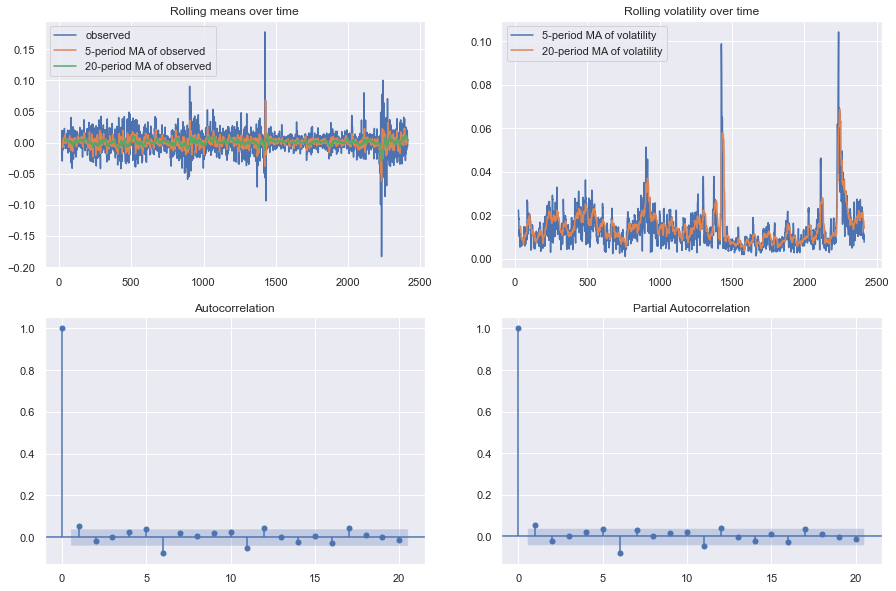

In [12]:
niftybank.dropna(inplace=True)
check_stationarity(niftybank['returns'],wl1=5,wl2=20,lags=20)

The returns are stationary

[Text(0.5, 1.0, 'Ljung-Box test results (after modeling nifty bank prices)'),
 Text(0.5, 0, 'Lags'),
 Text(0, 0.5, 'p-value')]

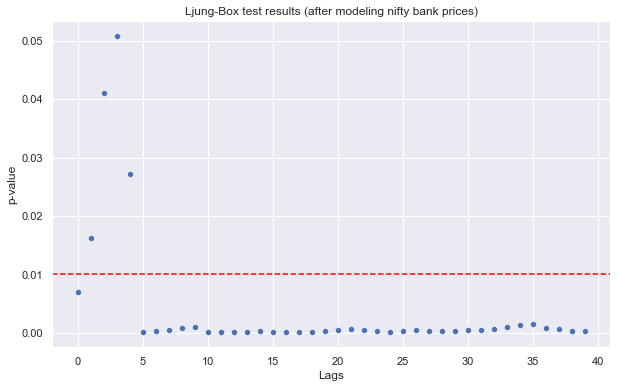

In [13]:
#check for autocorrelation - LJung Box Test
ljung_box_results = sm.stats.acorr_ljungbox(niftybank['returns'])
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.scatterplot(x=range(len(ljung_box_results[1])), y=ljung_box_results[1], ax=ax)
ax.axhline(0.01, ls='--', color='red')
ax.set(title=f"Ljung-Box test results (after modeling nifty bank prices)", xlabel='Lags', ylabel='p-value')

returns are serrially correlated

In [14]:
#check normality

from statsmodels.stats.stattools import jarque_bera

jb_test_stat, pvalue, _, _ = jarque_bera(niftybank['returns'])
print(f"Jarque-Bera statistic: {jb_test_stat:.2f} with p-value: {pvalue:.2f}")

if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

Jarque-Bera statistic: 20256.31 with p-value: 0.00
Our residuals are likely not normally distributed.


# Dependent Variable
1. we will try to predict positive returns
2. we will try to predict negative returns
3. we will try to predict probability of positive returns

In [92]:
import talib

In [93]:
#create nifty variables
nifty = pd.read_csv('niftybank.csv',header=0,parse_dates=True)
nifty['Date'] = nifty['Date'].apply(lambda x: str.strip(str(x)))
nifty['returns'] = np.log(nifty['Adj Close']/nifty['Adj Close'].shift(1))
for i in range(1,11):
    nifty[f'return_{i}d'] = nifty['returns'].shift(i)
nifty['MA5'] = nifty['Adj Close'].shift(1).rolling(window=5).mean()
nifty['MA20'] = nifty['Adj Close'].shift(1).rolling(window=20).mean()
nifty['MA5_ratio'] = nifty['Adj Close'].shift(1)/nifty['MA5']
nifty['MA20_ratio'] = nifty['Adj Close'].shift(1)/nifty['MA20']
nifty['High5'] = nifty['Adj Close'].shift(1).rolling(window=5).max()
nifty['Low5'] = nifty['Adj Close'].shift(1).rolling(window=5).min()
nifty['High20'] = nifty['Adj Close'].shift(1).rolling(window=20).max()
nifty['Low20'] = nifty['Adj Close'].shift(1).rolling(window=20).min()
nifty['High5_ratio'] = nifty['Adj Close'].shift(1)/nifty['High5']
nifty['Low5_ratio'] = nifty['Low5']/nifty['Adj Close'].shift(1)
nifty['High20_ratio'] = nifty['Adj Close'].shift(1)/nifty['High20']
nifty['Low20_ratio'] = nifty['Low20']/nifty['Adj Close'].shift(1)
nifty['Voltality5'] = nifty['returns'].shift(1).rolling(window=5).std()
nifty['Voltality20'] = nifty['returns'].shift(1).rolling(window=20).std()

In [94]:
nifty.shape

(67, 33)

In [95]:
nifty.dropna(inplace=True)

In [96]:
nifty.shape

(46, 33)

In [97]:
nifty.head(10)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,returns,return_1d,...,High5,Low5,High20,Low20,High5_ratio,Low5_ratio,High20_ratio,Low20_ratio,Voltality5,Voltality20
21,2020-11-02,Nifty Bank,24367.599609,25139.000000,24120.599609,24892.500000,24892.500000,0,0.040650,-0.007964,...,24769.500000,23900.900391,24769.500000,22370.949219,0.964933,1.000000,0.964933,0.935988,0.019665,0.017598
22,2020-11-03,Nifty Bank,25108.000000,25760.699219,25085.699219,25682.800781,25682.800781,0,0.031255,0.040650,...,24892.500000,23900.900391,24892.500000,22853.699219,1.000000,0.960165,1.000000,0.918096,0.026529,0.019456
23,2020-11-04,Nifty Bank,25539.550781,25891.000000,25142.000000,25771.599609,25771.599609,0,0.003452,0.031255,...,25682.800781,23900.900391,25682.800781,22964.800781,1.000000,0.930619,1.000000,0.894170,0.027133,0.020004
24,2020-11-05,Nifty Bank,26174.800781,26375.199219,26000.050781,26313.099609,26313.099609,0,0.020794,0.003452,...,25771.599609,23900.900391,25771.599609,23072.400391,1.000000,0.927412,1.000000,0.895265,0.022249,0.020010
25,2020-11-06,Nifty Bank,26274.099609,26853.449219,26135.300781,26798.949219,26798.949219,0,0.018296,0.020794,...,26313.099609,23900.900391,26313.099609,23072.400391,1.000000,0.908327,1.000000,0.876841,0.019885,0.020275
26,2020-11-09,Nifty Bank,27088.949219,27595.000000,27068.949219,27534.099609,27534.099609,0,0.027063,0.018296,...,26798.949219,24892.500000,26798.949219,23072.400391,1.000000,0.928861,1.000000,0.860944,0.014042,0.019848
27,2020-11-10,Nifty Bank,28039.449219,28802.500000,27916.900391,28606.000000,28606.000000,0,0.038191,0.027063,...,27534.099609,25682.800781,27534.099609,23072.400391,1.000000,0.932763,1.000000,0.837957,0.010651,0.020197
28,2020-11-11,Nifty Bank,28713.150391,29030.900391,28211.099609,28845.000000,28845.000000,0,0.008320,0.038191,...,28606.000000,25771.599609,28606.000000,23072.400391,1.000000,0.900916,1.000000,0.806558,0.012709,0.020899
29,2020-11-12,Nifty Bank,28633.750000,28672.900391,28066.050781,28278.800781,28278.800781,0,-0.019824,0.008320,...,28845.000000,26313.099609,28845.000000,23072.400391,1.000000,0.912224,1.000000,0.799875,0.011053,0.020848
30,2020-11-13,Nifty Bank,28108.699219,28520.550781,27703.300781,28465.699219,28465.699219,0,0.006587,-0.019824,...,28845.000000,26798.949219,28845.000000,23533.250000,0.980371,0.947669,0.980371,0.832187,0.022078,0.019468


In [98]:
def create_variables(symbol):
    df = pd.read_csv(symbol+'.csv',header=0)
    df['Date'] = df['Date'].apply(lambda x:str.strip(str(x)))
    df = df[(df["Volume"]!=0) & (df['Volume'].notnull())]
    df['returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    for i in range(1,11):
        df[f'return_{i}d'] = df['returns'].shift(i)
    df['Open_Chg'] = np.log(df['Open'].shift(1)/df['Open'].shift(2))
    df['High_Chg'] = np.log(df['High'].shift(1)/df['High'].shift(2))
    df['Low_Chg'] = np.log(df['Low'].shift(1)/df['Low'].shift(2))
    df['Range_Chg'] = np.log((df['High'].shift(1)-df['Low'].shift(1))/(df['High'].shift(2)-df['Low'].shift(2)))
    df['Volume_Chg'] = np.log(df['Volume'].shift(1)/df['Volume'].shift(2))
    df['Voltality5'] = df['returns'].shift(1).rolling(window=5).std()
    df['Voltality20'] = df['returns'].shift(1).rolling(window=20).std()
    df['MA5'] = df['Adj Close'].shift(1).rolling(window=5).mean()
    df['MA20'] = df['Adj Close'].shift(1).rolling(window=20).mean()
    df['High5'] = df['Adj Close'].shift(1).rolling(window=5).max()
    df['Low5'] = df['Adj Close'].shift(1).rolling(window=5).min()
    df['High20'] = df['Adj Close'].shift(1).rolling(window=20).max()
    df['Low20'] = df['Adj Close'].shift(1).rolling(window=20).min()
    df['MA5_ratio'] = df['Adj Close'].shift(1)/df['MA5']
    df['MA20_ratio'] = df['Adj Close'].shift(1)/df['MA20']
    df['High5_ratio'] = df['Adj Close'].shift(1)/df['High5']
    df['Low5_ratio'] = df['Low5']/df['Adj Close'].shift(1)
    df['High20_ratio'] = df['Adj Close'].shift(1)/df['High20']
    df['Low20_ratio'] = df['Low20']/df['Adj Close'].shift(1)
    df['future_return'] = np.log(df['Adj Close'].shift(-1)/df['Adj Close'])
    df['lift'] = df['future_return'].apply(lambda x: 1 if x >0 else 0)
    df['Price_Voltality5'] = df['Adj Close'].shift(1).rolling(window=5).std()
    df['Price_Voltality20'] = df['Adj Close'].shift(1).rolling(window=20).std()
    df['Bollinger5_ratio'] = (df['Adj Close'].shift(1)-df['MA5']+2*df['Price_Voltality5'])/(4*df['Price_Voltality5'])
    df['Bollinger20_ratio'] = (df['Adj Close'].shift(1)-df['MA20']+2*df['Price_Voltality20'])/(4*df['Price_Voltality20'])
    df['ADX5'] = talib.ADX(df['High'].shift(1),df['Low'].shift(1),df['Close'].shift(1),5)/100
    df['ADX20'] = talib.ADX(df['High'].shift(1),df['Low'].shift(1),df['Close'].shift(1),20)/100
    df['RSI5'] = talib.RSI(df['Adj Close'].shift(1),5)/100
    df['RSI20'] = talib.RSI(df['Adj Close'].shift(1),20)/100
    df = df.merge(nifty,left_on='Date',right_on='Date',suffixes=['','_nifty'],how='inner')
    df.dropna(inplace=True)
    df['correlation'] = df.apply(lambda x : np.corrcoef(list(x[[f'return_{i}d' for i in range(1,11)]]),list(x[[f'return_{i}d_nifty' for i in range(1,11)]]))[0,1],axis=1)
    return df

In [99]:
df = pd.DataFrame()
for symbol in list(nifty_bank_shares['Symbol']):
    print(symbol)
    df = df.append(create_variables(symbol))

HDFCBANK
ICICIBANK
KOTAKBANK
AXISBANK
SBIN
INDUSINDBK
BANDHANBNK
FEDERALBNK
RBLBANK
IDFCFIRSTB
BANKBARODA
PNB


In [100]:
df['Symbol'].value_counts()

FEDERALBNK    26
ICICIBANK     26
HDFCBANK      26
INDUSINDBK    26
IDFCFIRSTB    26
KOTAKBANK     26
RBLBANK       26
BANKBARODA    26
AXISBANK      26
SBIN          26
PNB           26
BANDHANBNK    26
Name: Symbol, dtype: int64

In [101]:
df.shape

(312, 81)

In [105]:
df.reset_index(inplace=True)
for col in df.columns:
    if (df[col].isnull().any()):
        print(col)

In [106]:
df.to_csv('piv.csv',index=False)

In [16]:
df[df['Date']<='2015-12-31'].to_csv('dev.csv',index=False)

In [17]:
df[(df['Date']>'2015-12-31') & (df['Date']<='2018-04-30')].to_csv('val.csv',index=False)

In [18]:
df[df['Date']>'2018-04-30'].to_csv('oot.csv',index=False)

# Check Price Stationarity of stocks and nifty

In [8]:
def check_price_stationarity(symbol):
    df = pd.read_csv(symbol+'.csv',header=0,parse_dates=True)
    y = df['Adj Close']
    adftest = adfuller(y, autolag='AIC')
    return pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags','# of Observations'])

In [9]:
df = pd.DataFrame()
for symbol in list(nifty_bank_shares['Symbol'])+['niftybank']:
    df[symbol]=check_price_stationarity(symbol)

In [10]:
df.head()

,HDFCBANK,ICICIBANK,KOTAKBANK,AXISBANK,SBIN,INDUSINDBK,BANDHANBNK,FEDERALBNK,RBLBANK,IDFCFIRSTB,BANKBARODA,PNB,niftybank
Test Statistic,0.223737,-0.489318,0.477716,-1.433993,-2.241049,-1.466356,-1.764744,-1.671596,-1.015324,-2.055295,-2.265062,-1.836071,-0.853319
p-value,0.973562,0.894084,0.984180,0.565875,0.191686,0.550084,0.398100,0.445803,0.747634,0.262866,0.183484,0.362706,0.802957
# of Lags,28.000000,17.000000,28.000000,0.000000,17.000000,9.000000,1.000000,16.000000,1.000000,6.000000,0.000000,1.000000,12.000000
# of Observations,2670.000000,2681.000000,2670.000000,2698.000000,2681.000000,2689.000000,666.000000,2682.000000,1054.000000,1249.000000,2698.000000,2697.000000,2401.000000


In [11]:
df.to_excel('../Statistics/stationarity_check.xlsx')

In [32]:
df = pd.read_csv('KOTAKBANK.csv',header=0,parse_dates=True)
y = df['Adj Close']
adftest = adfuller(y, maxlag=5)

In [33]:
adftest

(0.8047838667195825,
 0.991712997466942,
 3,
 2695,
 {'1%': -3.432778771617089,
  '5%': -2.862613052530749,
  '10%': -2.5673412216328595},
 22576.555584217633)